In [3]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl.metadata (879 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 5.9 MB/s eta 0:00:0000:0100:01
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 11.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.5 MB/s eta 0:00:00
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.2
    Uninstalling tqdm-4.66.2:
      Successfully uninstalled tqdm-4.66.2
  Attempting uninstall: reques

In [4]:
from datasets import load_dataset

ds = load_dataset("roneneldan/TinyStories")

/Users/morayo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/morayo/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
ds["train"]

Dataset({
    features: ['text'],
    num_rows: 2119719
})

In [7]:
# Different ways to access the text data

# 1. Access a single story by index
print("=== Single story (index 0) ===")
first_story = ds["train"][0]["text"]
print(first_story)
print()

# 2. Access multiple stories
print("=== First 3 stories ===")
first_three = ds["train"][:3]["text"]
for i, story in enumerate(first_three):
    print(f"Story {i+1}:")
    print(story)
    print("-" * 50)

# 3. Access a random story
import random
random_index = random.randint(0, len(ds["train"]) - 1)
print(f"=== Random story (index {random_index}) ===")
random_story = ds["train"][random_index]["text"]
print(random_story)

=== Single story (index 0) ===
One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.

Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."

Together, they shared the needle and sewed the button on Lily's shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.

=== First 3 stories ===
Story 1:
One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.

Lily went to her mom

In [8]:
ds["train"][:3]["text"]

['One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.\n\nLily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."\n\nTogether, they shared the needle and sewed the button on Lily\'s shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.',
 'Once upon a time, there was a little car named Beep. Beep loved to go fast and play in the sun. Beep was a healthy car because he always had good fuel. Good fuel made Beep happy and strong.\n\nOne day, Beep was driving in the park when he saw a big tree. The tree had many leaves that we

In [9]:
# Install required packages for BERT similarity analysis
!pip install sentence-transformers scikit-learn numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.8 MB/s eta 0:00:00
  Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.6/284.6 kB 6.6 MB/s eta 0:00:00
Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl (418 kB)
Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [10]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize BERT model for sentence embeddings
print("Loading BERT model...")
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and efficient BERT model
print("Model loaded successfully!")

Loading BERT model...
Model loaded successfully!
Model loaded successfully!


In [11]:
# Sample a subset of stories for analysis (full dataset is too large for quick analysis)
# You can adjust this number based on your computer's memory and processing power
SAMPLE_SIZE = 1000  # Start with 1000 stories

print(f"Sampling {SAMPLE_SIZE} stories from the dataset...")
import random
random.seed(42)  # For reproducible results

# Get random indices
total_stories = len(ds["train"])
random_indices = random.sample(range(total_stories), SAMPLE_SIZE)

# Extract the stories
sampled_stories = [ds["train"][i]["text"] for i in random_indices]

print(f"Sampled {len(sampled_stories)} stories")
print(f"Average story length: {np.mean([len(story) for story in sampled_stories]):.1f} characters")
print(f"First story preview: {sampled_stories[0][:200]}...")

Sampling 1000 stories from the dataset...
Sampled 1000 stories
Average story length: 894.2 characters
First story preview: One day, a little boy named Tim was very excited. He saw a big gray dog in the park. The dog was playing with a ball. Tim wanted to play with the dog too.

Tim went to his mom and asked her to explain...
Sampled 1000 stories
Average story length: 894.2 characters
First story preview: One day, a little boy named Tim was very excited. He saw a big gray dog in the park. The dog was playing with a ball. Tim wanted to play with the dog too.

Tim went to his mom and asked her to explain...


In [12]:
# Generate BERT embeddings for the sampled stories
print("Generating BERT embeddings...")
print("This may take a few minutes depending on your sample size...")

# For very long stories, we might want to truncate them to avoid memory issues
max_length = 512  # BERT models typically have a max sequence length
truncated_stories = [story[:max_length] if len(story) > max_length else story for story in sampled_stories]

# Generate embeddings
embeddings = model.encode(truncated_stories, show_progress_bar=True)

print(f"Generated embeddings shape: {embeddings.shape}")
print(f"Each story is now represented as a {embeddings.shape[1]}-dimensional vector")

Generating BERT embeddings...
This may take a few minutes depending on your sample size...


Batches: 100%|██████████| 32/32 [00:07<00:00,  4.46it/s]

Generated embeddings shape: (1000, 384)
Each story is now represented as a 384-dimensional vector


In [13]:
# Perform K-means clustering to group similar stories
# You can adjust the number of clusters based on how many groups you want
N_CLUSTERS = 10  # Start with 10 groups

print(f"Performing K-means clustering with {N_CLUSTERS} clusters...")
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

print(f"Clustering complete!")
print(f"Stories distributed across clusters:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} stories")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Performing K-means clustering with 10 clusters...
Clustering complete!
Stories distributed across clusters:
  Cluster 0: 84 stories
  Cluster 1: 123 stories
  Cluster 2: 134 stories
  Cluster 3: 110 stories
  Cluster 4: 135 stories
  Cluster 5: 56 stories
  Cluster 6: 56 stories
  Cluster 7: 75 stories
  Cluster 8: 111 stories
  Cluster 9: 116 stories
Clustering complete!
Stories distributed across clusters:
  Cluster 0: 84 stories
  Cluster 1: 123 stories
  Cluster 2: 134 stories
  Cluster 3: 110 stories
  Cluster 4: 135 stories
  Cluster 5: 56 stories
  Cluster 6: 56 stories
  Cluster 7: 75 stories
  Cluster 8: 111 stories
  Cluster 9: 116 stories


In [ ]:
# Analyze and display examples from each cluster
def show_cluster_examples(cluster_id, num_examples=3):
    """Show examples of stories from a specific cluster"""
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    print(f"\n=== CLUSTER {cluster_id} ({len(cluster_indices)} stories) ===")
    
    # Show a few examples
    for i, idx in enumerate(cluster_indices[:num_examples]):
        print(f"\nExample {i+1}:")
        story = sampled_stories[idx]
        # Show first 300 characters
        print(f"{story[:]}")
        print("-" * 80)

# Show examples from each cluster
for cluster_id in range(N_CLUSTERS):
    show_cluster_examples(cluster_id, num_examples=2)

In [29]:
# Analyze and display examples from each cluster - only 4-line stories
def show_cluster_examples(cluster_id, num_examples=3):
    """Show examples of stories from a specific cluster that have exactly 4 lines"""
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    # Filter for stories with exactly 4 lines (4 newline characters)
    four_line_stories = []
    for idx in cluster_indices:
        story = sampled_stories[idx]
        if story.count('\n') == 4:
            four_line_stories.append(idx)
    
    print(f"\n=== CLUSTER {cluster_id} ({len(cluster_indices)} total stories, {len(four_line_stories)} with 4 lines) ===")
    
    if len(four_line_stories) == 0:
        print("No 4-line stories found in this cluster")
        return
    
    # Show examples from 4-line stories only
    for i, idx in enumerate(four_line_stories[:num_examples]):
        print(f"\nExample {i+1} (4-line story):")
        story = sampled_stories[idx]
        print(f"{story}")
        print("-" * 80)

# Show examples from each cluster
for cluster_id in range(N_CLUSTERS):
    show_cluster_examples(cluster_id, num_examples=2)


=== CLUSTER 0 (84 total stories, 15 with 4 lines) ===

Example 1 (4-line story):
Once upon a time, there was a big tank near a village. Lots of fish lived in the tank and villagers loved to catch them. One day, a little boy went to the tank to catch some fish. He reached into the water, but he couldn't catch any fish. He tried and tried, but he still couldn't catch any. 

Suddenly, he saw a dead fish floating on the surface of the water. He felt sad for the fish and thought about why it had died. Then he realized that he had been trying to catch the fish all wrong. He had been using a sharp hook that hurt the fish, but he should have been using a net that would let the fish swim free. 

The little boy learned a valuable lesson that day. He realized that sometimes we need to change the way we do things to be kinder to others. From that day on, he always used a net to catch fish and he never hurt any of them again.
------------------------------------------------------------------------

Creating visualization of story clusters...


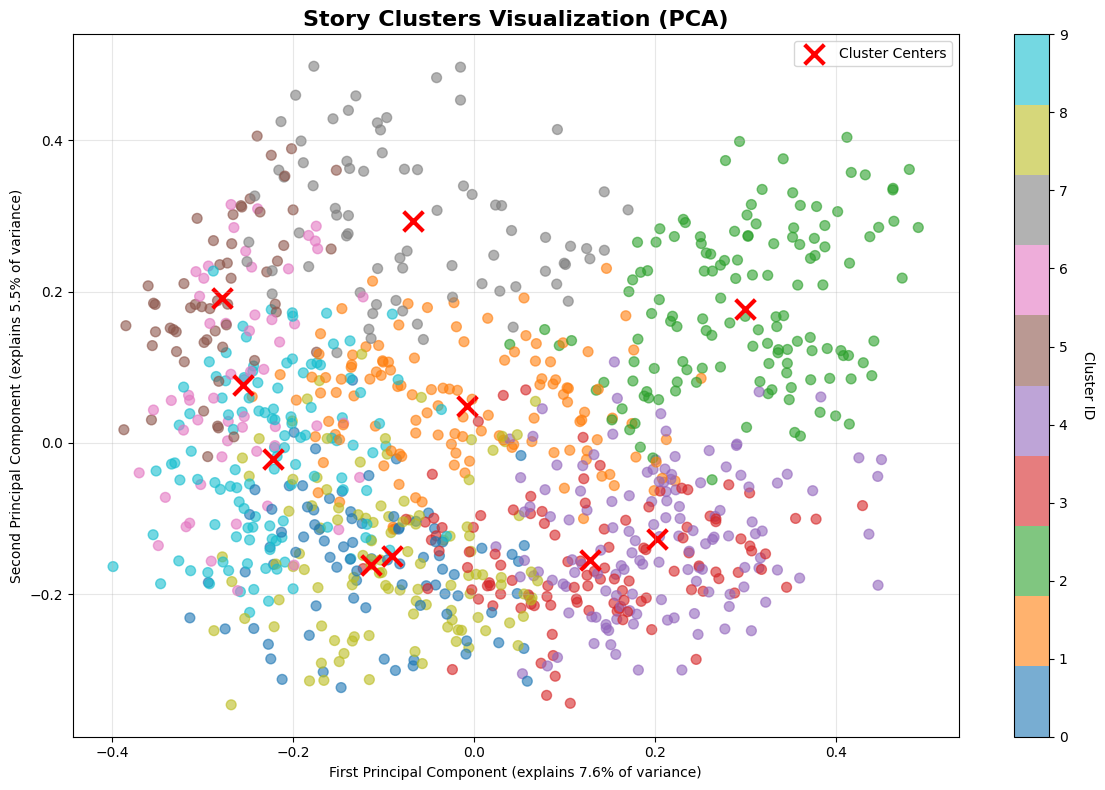

Total variance explained by 2D projection: 13.1%


In [15]:
# Visualize the clusters using PCA (Principal Component Analysis)
print("Creating visualization of story clusters...")

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(embeddings)

# Create the plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     c=cluster_labels, cmap='tab10', alpha=0.6, s=50)

plt.title('Story Clusters Visualization (PCA)', fontsize=16, fontweight='bold')
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} of variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} of variance)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID', rotation=270, labelpad=20)

# Add cluster centers
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2D projection: {pca.explained_variance_ratio_.sum():.1%}")

In [16]:
# Find most similar stories within clusters
def find_most_similar_stories(cluster_id, top_n=3):
    """Find the most similar stories within a cluster"""
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    if len(cluster_indices) < 2:
        print(f"Cluster {cluster_id} has only {len(cluster_indices)} stories")
        return
    
    # Get embeddings for this cluster
    cluster_embeddings = embeddings[cluster_indices]
    
    # Calculate pairwise cosine similarities
    similarities = cosine_similarity(cluster_embeddings)
    
    # Find the most similar pair (excluding self-similarities)
    np.fill_diagonal(similarities, -1)  # Remove self-similarities
    
    # Get the indices of the most similar pairs
    max_sim_idx = np.unravel_index(np.argmax(similarities), similarities.shape)
    similarity_score = similarities[max_sim_idx]
    
    # Map back to original indices
    story1_idx = cluster_indices[max_sim_idx[0]]
    story2_idx = cluster_indices[max_sim_idx[1]]
    
    print(f"\n=== MOST SIMILAR STORIES IN CLUSTER {cluster_id} ===")
    print(f"Similarity Score: {similarity_score:.3f}")
    print(f"\nStory 1:")
    print(f"{sampled_stories[story1_idx][:400]}{'...' if len(sampled_stories[story1_idx]) > 400 else ''}")
    print(f"\nStory 2:")
    print(f"{sampled_stories[story2_idx][:400]}{'...' if len(sampled_stories[story2_idx]) > 400 else ''}")
    print("=" * 80)

# Show most similar stories for first few clusters
for cluster_id in range(min(5, N_CLUSTERS)):  # Show first 5 clusters
    find_most_similar_stories(cluster_id)


=== MOST SIMILAR STORIES IN CLUSTER 0 ===
Similarity Score: 0.762

Story 1:
Jim was an old clown who liked to play with the children. One day he was in the park and he wanted to do a show. He had a bag of tricks with him and he pulled out some old glue. He threw it up in the air and it made a funny shape. The children laughed and clapped.

Then Jim decided to throw some other tricks. He threw a ball up in the air and it made a big arch. The children laughed and clapped ag...

Story 2:
One day, Jim was feeling really miserable. He was pushing and pulling on the door, but it wouldn't open. He thought about what he could do. 

Suddenly, he remembered he had a glove. He carefully picked it up and put it on his tiny hand. Then, Jim put his hand on the door and started to wipe. Surprisingly, it slowly opened! 

He was so excited. He jumped up and down clapping. Now he could play insi...

=== MOST SIMILAR STORIES IN CLUSTER 1 ===
Similarity Score: 0.834

Story 1:
Once upon a time, there was 

In [17]:
# Save the clustering results for later use
import pandas as pd
import pickle

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'story_index': random_indices,  # Original indices in the dataset
    'story_text': sampled_stories,
    'cluster_id': cluster_labels,
    'story_length': [len(story) for story in sampled_stories]
})

# Save to CSV
results_df.to_csv('story_clusters.csv', index=False)
print("Results saved to 'story_clusters.csv'")

# Save the model and embeddings for later use
with open('clustering_model.pkl', 'wb') as f:
    pickle.dump({
        'kmeans_model': kmeans,
        'embeddings': embeddings,
        'bert_model_name': 'all-MiniLM-L6-v2',
        'sample_indices': random_indices
    }, f)
print("Model and embeddings saved to 'clustering_model.pkl'")

# Display summary statistics
print(f"\n=== CLUSTERING SUMMARY ===")
print(f"Total stories analyzed: {len(sampled_stories)}")
print(f"Number of clusters: {N_CLUSTERS}")
print(f"Average stories per cluster: {len(sampled_stories)/N_CLUSTERS:.1f}")
print(f"\nCluster size distribution:")
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    print(f"  Cluster {cluster_id}: {size} stories ({size/len(sampled_stories)*100:.1f}%)")

Results saved to 'story_clusters.csv'
Model and embeddings saved to 'clustering_model.pkl'

=== CLUSTERING SUMMARY ===
Total stories analyzed: 1000
Number of clusters: 10
Average stories per cluster: 100.0

Cluster size distribution:
  Cluster 0: 84 stories (8.4%)
  Cluster 1: 123 stories (12.3%)
  Cluster 2: 134 stories (13.4%)
  Cluster 3: 110 stories (11.0%)
  Cluster 4: 135 stories (13.5%)
  Cluster 5: 56 stories (5.6%)
  Cluster 6: 56 stories (5.6%)
  Cluster 7: 75 stories (7.5%)
  Cluster 8: 111 stories (11.1%)
  Cluster 9: 116 stories (11.6%)


In [33]:
# Load and explore the Raw_coding_EN.csv file
import pandas as pd
import os

# Check if the file exists
csv_file_path = "Raw_coding_grouped.csv"
if os.path.exists(csv_file_path):
    print(f"✅ File found: {csv_file_path}")
    
    # Load the CSV file
    df = pd.read_csv(csv_file_path)
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"Shape: {df.shape} (rows, columns)")
    print(f"Columns: {list(df.columns)}")
    
    print(f"\n📋 FIRST FEW ROWS:")
    print(df.head())
    
    print(f"\n🔍 DATA TYPES:")
    print(df.dtypes)
    
    print(f"\n📈 BASIC STATISTICS:")
    print(df.describe(include='all'))
    
    print(f"\n❓ NULL VALUES:")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
else:
    print(f"❌ File not found: {csv_file_path}")
    print("Let me check what files are available in the current directory:")
    print(os.listdir("."))

✅ File found: Raw_coding_grouped.csv

📊 DATASET OVERVIEW:
Shape: (204, 8) (rows, columns)
Columns: ['Yrs group', 'ID', 'text', 'label', 'label_2', 'label_3', 'label_4', 'grouped_label']

📋 FIRST FEW ROWS:
  Yrs group  ID                                               text  \
0     5-Mar  1A  ***[child's name] starting from 18 months had ...   
1     5-Mar  2A  ***[child's name] at 18 months, started to ref...   
2     5-Mar  3A  Food is still very complicated. My daughter on...   
3     5-Mar  3A  Only meat. She only eats meat. Even as a baby,...   
4     5-Mar  2A  He is much more rigid with food. Right now, we...   

              label label_2 label_3 label_4 grouped_label  
0  Food selectivity     NaN     NaN     NaN     olfactory  
1  Food selectivity     NaN     NaN     NaN     olfactory  
2  Food selectivity     NaN     NaN     NaN     olfactory  
3  Food selectivity     NaN     NaN     NaN     olfactory  
4  Food selectivity  Crises     NaN     NaN     olfactory  

🔍 DATA TYPES:

In [36]:
# Find similarity between CSV rows and stories with more than 4 lines
from sklearn.metrics.pairwise import cosine_similarity

# Check if we have the CSV data loaded
if 'df' in locals() and len(df) > 0:
    print("🔍 FINDING SIMILARITIES BETWEEN CSV ROWS AND LONG STORIES")
    print("=" * 70)
    
    # Get the first 5 rows from CSV (assuming there's a text column)
    # Try to identify the text column
    text_columns = [col for col in df.columns if 'text' in col.lower() or 'story' in col.lower() or 'content' in col.lower()]
    
    if text_columns:
        text_col = text_columns[0]
        print(f"📝 Using text column: '{text_col}'")
        csv_texts = df[text_col].head(5).dropna().tolist()
    else:
        # If no obvious text column, show available columns and use the first string column
        string_cols = [col for col in df.columns if df[col].dtype == 'object']
        if string_cols:
            text_col = string_cols[0]
            print(f"📝 No obvious text column found. Using: '{text_col}'")
            csv_texts = df[text_col].head(5).dropna().tolist()
        else:
            print("❌ No text columns found in CSV")
            csv_texts = []
    
    if csv_texts:
        print(f"Found {len(csv_texts)} text entries from CSV to compare")
        
        # Filter stories with more than 4 lines from our sampled stories
        long_stories = []
        long_story_indices = []
        
        for i, story in enumerate(sampled_stories):
            if story.count('\n') > 4:
                long_stories.append(story)
                long_story_indices.append(i)
        
        print(f"Found {len(long_stories)} stories with more than 4 lines out of {len(sampled_stories)} total stories")
        
        if len(long_stories) > 0:
            # Generate embeddings for CSV texts
            print("\n🧠 Generating embeddings for CSV texts...")
            csv_embeddings = model.encode(csv_texts, show_progress_bar=True)
            
            # Generate embeddings for long stories (truncate if needed)
            print("🧠 Generating embeddings for long stories...")
            truncated_long_stories = [story[:] if len(story) > 512 else story for story in long_stories]
            long_story_embeddings = model.encode(truncated_long_stories, show_progress_bar=True)
            
            # Calculate similarities
            print("\n📊 Calculating similarities...")
            similarities = cosine_similarity(csv_embeddings, long_story_embeddings)
            
            # For each CSV text, find the most similar stories
            for i, csv_text in enumerate(csv_texts):
                print(f"\n🎯 CSV ROW {i+1} SIMILARITIES:")
                print(f"Original text: {csv_text[:]}")
                print("-" * 50)
                
                # Get similarity scores for this CSV text
                row_similarities = similarities[i]
                
                # Find top 3 most similar stories
                top_indices = row_similarities.argsort()[-3:][::-1]  # Top 3, descending
                
                for rank, story_idx in enumerate(top_indices, 1):
                    similarity_score = row_similarities[story_idx]
                    original_story_idx = long_story_indices[story_idx]
                    story_text = long_stories[story_idx]
                    
                    print(f"\n  Rank {rank} - Similarity: {similarity_score:.3f}")
                    print(f"  Story (from cluster {cluster_labels[original_story_idx]}):")
                    print(f"  {story_text[:]}")
                    print("  " + "-" * 40)
        else:
            print("❌ No stories with more than 4 lines found in the sample")
    else:
        print("❌ No valid text data found in CSV")
else:
    print("❌ No CSV data loaded. Please run the CSV loading cell first.")

🔍 FINDING SIMILARITIES BETWEEN CSV ROWS AND LONG STORIES
📝 Using text column: 'text'
Found 5 text entries from CSV to compare
Found 719 stories with more than 4 lines out of 1000 total stories

🧠 Generating embeddings for CSV texts...


Batches: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]



🧠 Generating embeddings for long stories...


Batches: 100%|██████████| 23/23 [00:04<00:00,  5.30it/s]



📊 Calculating similarities...

🎯 CSV ROW 1 SIMILARITIES:
Original text: ***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything. He was a big fan of broccoli [silence] and from one day to the next decided that he would only eat pasta, ground beef, and green beans. But frozen, without butter, it couldn't be canned. Especially not fresh, without seasoning, no salt, so there you go. So we already started to question it with my husband, saying it's strange. Anything with a cake-like texture was out of the question. Anything like yogurt. A lot of eating disorders eventually. It always had to be the same thing, and when it wasn't, the plate would fly, he would scream, he would have huge tantrums.
--------------------------------------------------

  Rank 1 - Similarity: 0.483
  Story (from cluster 3):
  Once upon a time, there was a little boy named Timmy. Timmy loved to play with his toys and watch cartoons on the TV. One day, his mom gave him a big 


📈 SIMILARITY ANALYSIS SUMMARY
Total comparisons made: 5 CSV texts × 719 long stories = 3595
Average similarity: 0.136
Max similarity found: 0.483
Min similarity found: -0.139
Standard deviation: 0.092

🎯 Similarity Distribution:
  High similarity (>0.7): 0 (0.0%)
  Medium similarity (0.5-0.7): 0 (0.0%)
  Low similarity (≤0.5): 3595 (100.0%)

🏆 BEST OVERALL MATCH:
CSV Row 1 ↔ Story 72
Similarity Score: 0.483

CSV Text: ***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything. He was a big fan of broccoli [silence] and from one d...

Matched Story: Once upon a time, there was a little boy named Timmy. Timmy loved to play with his toys and watch cartoons on the TV. One day, his mom gave him a big ...


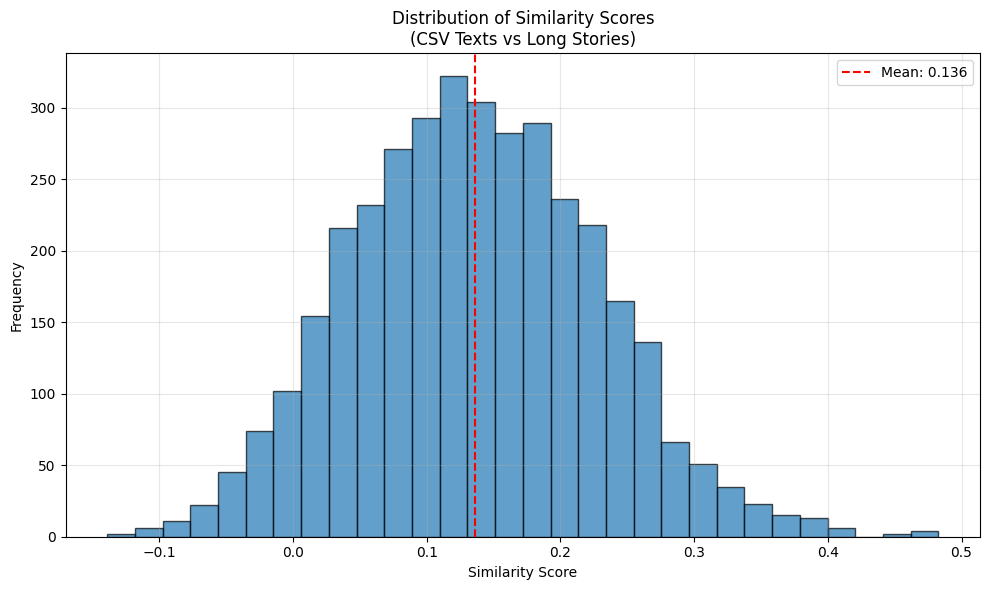

In [37]:
# Summary statistics of the similarity analysis
if 'similarities' in locals() and 'csv_texts' in locals():
    print("\n📈 SIMILARITY ANALYSIS SUMMARY")
    print("=" * 50)
    
    # Overall statistics
    all_similarities = similarities.flatten()
    print(f"Total comparisons made: {len(csv_texts)} CSV texts × {len(long_stories)} long stories = {len(all_similarities)}")
    print(f"Average similarity: {all_similarities.mean():.3f}")
    print(f"Max similarity found: {all_similarities.max():.3f}")
    print(f"Min similarity found: {all_similarities.min():.3f}")
    print(f"Standard deviation: {all_similarities.std():.3f}")
    
    # Distribution of similarities
    import numpy as np
    high_sim = np.sum(all_similarities > 0.7)
    medium_sim = np.sum((all_similarities > 0.5) & (all_similarities <= 0.7))
    low_sim = np.sum(all_similarities <= 0.5)
    
    print(f"\n🎯 Similarity Distribution:")
    print(f"  High similarity (>0.7): {high_sim} ({high_sim/len(all_similarities)*100:.1f}%)")
    print(f"  Medium similarity (0.5-0.7): {medium_sim} ({medium_sim/len(all_similarities)*100:.1f}%)")
    print(f"  Low similarity (≤0.5): {low_sim} ({low_sim/len(all_similarities)*100:.1f}%)")
    
    # Best matches overall
    best_match_idx = np.unravel_index(np.argmax(similarities), similarities.shape)
    best_csv_idx, best_story_idx = best_match_idx
    best_similarity = similarities[best_csv_idx, best_story_idx]
    
    print(f"\n🏆 BEST OVERALL MATCH:")
    print(f"CSV Row {best_csv_idx + 1} ↔ Story {best_story_idx + 1}")
    print(f"Similarity Score: {best_similarity:.3f}")
    print(f"\nCSV Text: {csv_texts[best_csv_idx][:150]}{'...' if len(csv_texts[best_csv_idx]) > 150 else ''}")
    print(f"\nMatched Story: {long_stories[best_story_idx][:150]}{'...' if len(long_stories[best_story_idx]) > 150 else ''}")
    
    # Create a simple visualization
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_similarities, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Similarity Scores\n(CSV Texts vs Long Stories)')
    plt.axvline(all_similarities.mean(), color='red', linestyle='--', label=f'Mean: {all_similarities.mean():.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("No similarity data available. Run the previous cell first.")

In [38]:
# Function to create a dictionary grouping text by labels
def create_label_text_dictionary(dataframe, label_column, text_column):
    """
    Create a dictionary where each label is a key and values are lists of text under that label
    
    Parameters:
    - dataframe: pandas DataFrame containing the data
    - label_column: string, name of the column containing labels
    - text_column: string, name of the column containing text
    
    Returns:
    - dictionary: {label: [list of texts]}
    """
    label_dict = {}
    
    # Group by label and collect texts
    for label in dataframe[label_column].unique():
        if pd.notna(label):  # Skip NaN labels
            # Get all texts for this label
            texts = dataframe[dataframe[label_column] == label][text_column].dropna().tolist()
            label_dict[label] = texts
    
    return label_dict

# Test the function with the loaded CSV data
if 'df' in locals() and len(df) > 0:
    print("🏷️  CREATING LABEL-TEXT DICTIONARY")
    print("=" * 50)
    
    # Show available columns
    print(f"Available columns: {list(df.columns)}")
    
    # Try to identify label and text columns automatically
    label_columns = [col for col in df.columns if 'label' in col.lower() or 'category' in col.lower() or 'class' in col.lower()]
    text_columns = [col for col in df.columns if 'text' in col.lower() or 'story' in col.lower() or 'content' in col.lower()]
    
    if not text_columns:
        # If no obvious text column, use string columns
        text_columns = [col for col in df.columns if df[col].dtype == 'object']
    
    print(f"Potential label columns: {label_columns}")
    print(f"Potential text columns: {text_columns}")
    
    # Create dictionary with the first available label and text columns
    if label_columns and text_columns:
        label_col = label_columns[0]
        text_col = text_columns[0]
        
        print(f"\n📊 Using label column: '{label_col}'")
        print(f"📝 Using text column: '{text_col}'")
        
        # Create the dictionary
        label_text_dict = create_label_text_dictionary(df, label_col, text_col)
        
        print(f"\n🎯 RESULTS:")
        print(f"Total unique labels: {len(label_text_dict)}")
        
        # Show summary for each label
        for label, texts in label_text_dict.items():
            print(f"\n📌 Label: '{label}'")
            print(f"   Number of texts: {len(texts)}")
            print(f"   Sample texts:")
            for i, text in enumerate(texts[:3]):  # Show first 3 texts
                preview = text[:100] + "..." if len(text) > 100 else text
                print(f"     {i+1}. {preview}")
            if len(texts) > 3:
                print(f"     ... and {len(texts)-3} more texts")
        
        print(f"\n💾 Dictionary saved as 'label_text_dict' variable")
        
    else:
        print("❌ Could not automatically identify label and text columns")
        print("Please specify the columns manually:")
        print("Example: label_text_dict = create_label_text_dictionary(df, 'your_label_column', 'your_text_column')")

else:
    print("❌ No CSV data loaded. Please run the CSV loading cell first.")

🏷️  CREATING LABEL-TEXT DICTIONARY
Available columns: ['Yrs group', 'ID', 'text', 'label', 'label_2', 'label_3', 'label_4', 'grouped_label']
Potential label columns: ['label', 'label_2', 'label_3', 'label_4', 'grouped_label']
Potential text columns: ['text']

📊 Using label column: 'label'
📝 Using text column: 'text'

🎯 RESULTS:
Total unique labels: 73

📌 Label: 'Food selectivity'
   Number of texts: 7
   Sample texts:
     1. ***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything. He ...
     2. ***[child's name] at 18 months, started to refuse all foods [silence] not all foods but almost. So a...
     3. Food is still very complicated. My daughter only eats meat. And no matter how much we try to cook fo...
     ... and 4 more texts

📌 Label: 'Pica'
   Number of texts: 1
   Sample texts:
     1. Me, she eats everything. So I try [thinking] I avoid it. In her stools, I find everything. Stones, s...

📌 Label: 'Food selectivity '
   Number of texts

In [39]:
# Additional utility functions for working with label dictionaries

def analyze_label_dictionary(label_dict):
    """
    Analyze the label dictionary and provide statistics
    """
    print("📊 LABEL DICTIONARY ANALYSIS")
    print("=" * 40)
    
    total_texts = sum(len(texts) for texts in label_dict.values())
    print(f"Total labels: {len(label_dict)}")
    print(f"Total texts: {total_texts}")
    print(f"Average texts per label: {total_texts/len(label_dict):.1f}")
    
    # Sort labels by number of texts
    sorted_labels = sorted(label_dict.items(), key=lambda x: len(x[1]), reverse=True)
    
    print(f"\n🏆 Labels by text count:")
    for label, texts in sorted_labels:
        print(f"  '{label}': {len(texts)} texts")
    
    return sorted_labels

def get_texts_by_label(label_dict, target_label):
    """
    Get all texts for a specific label
    """
    if target_label in label_dict:
        return label_dict[target_label]
    else:
        print(f"❌ Label '{target_label}' not found")
        print(f"Available labels: {list(label_dict.keys())}")
        return []

def search_labels_by_keyword(label_dict, keyword):
    """
    Find labels that contain a specific keyword
    """
    matching_labels = {}
    keyword_lower = keyword.lower()
    
    for label, texts in label_dict.items():
        if keyword_lower in str(label).lower():
            matching_labels[label] = texts
    
    return matching_labels

def export_label_dictionary_to_files(label_dict, base_filename="label_texts"):
    """
    Export each label's texts to separate files
    """
    import os
    
    # Create directory if it doesn't exist
    output_dir = f"{base_filename}_output"
    os.makedirs(output_dir, exist_ok=True)
    
    for label, texts in label_dict.items():
        # Clean label name for filename
        safe_label = str(label).replace(" ", "_").replace("/", "_").replace("\\", "_")
        filename = f"{output_dir}/{safe_label}.txt"
        
        with open(filename, 'w', encoding='utf-8') as f:
            for i, text in enumerate(texts, 1):
                f.write(f"=== Text {i} ===\n")
                f.write(f"{text}\n\n")
        
        print(f"💾 Exported {len(texts)} texts for label '{label}' to {filename}")

# Test the utility functions if we have a label dictionary
if 'label_text_dict' in locals():
    print("🔧 TESTING UTILITY FUNCTIONS")
    print("=" * 50)
    
    # Analyze the dictionary
    sorted_labels = analyze_label_dictionary(label_text_dict)
    
    # Example usage
    if len(label_text_dict) > 0:
        first_label = list(label_text_dict.keys())[0]
        print(f"\n📖 Example - Getting texts for label '{first_label}':")
        texts = get_texts_by_label(label_text_dict, first_label)
        print(f"Found {len(texts)} texts")
        
        # Show first text as example
        if texts:
            print(f"First text: {texts[0][:150]}{'...' if len(texts[0]) > 150 else ''}")
    
    print("\n💡 Available functions:")
    print("  - analyze_label_dictionary(label_dict)")
    print("  - get_texts_by_label(label_dict, 'label_name')")
    print("  - search_labels_by_keyword(label_dict, 'keyword')")
    print("  - export_label_dictionary_to_files(label_dict)")
    
else:
    print("No label dictionary available yet. Run the previous cell first.")

🔧 TESTING UTILITY FUNCTIONS
📊 LABEL DICTIONARY ANALYSIS
Total labels: 73
Total texts: 203
Average texts per label: 2.8

🏆 Labels by text count:
  'Noise sensitivity': 12 texts
  'Stimming through a preferred sensory channel': 10 texts
  'Difficulty managing emotions': 9 texts
  'Food selectivity': 7 texts
  'Noises': 7 texts
  'Dysregulation': 6 texts
  'Proprioceptive and vestibular stimming': 6 texts
  'Sensory tools': 6 texts
  'Vestibular stimming': 5 texts
  'Action': 5 texts
  'Seeking deep pressure': 5 texts
  'Physical contact': 5 texts
  'Food selectivity ': 4 texts
  'Aversion to water': 4 texts
  'Olfactory sensitivity': 4 texts
  'Crises': 4 texts
  'Sole of the foot sensitivity': 4 texts
  'Alignment': 4 texts
  'Light sensitivity': 4 texts
  'Sensitivity to flavor': 3 texts
  'Lack of danger awarness': 3 texts
  'Regulation': 3 texts
  'Adjustment time': 3 texts
  'Adaptation difficulty': 3 texts
  'Anticipation': 3 texts
  'Deep pressure': 3 texts
  'Attention modulation

In [41]:
label_text_dict.keys()

dict_keys(['Food selectivity', 'Pica', 'Food selectivity ', 'Food separation', 'Food rigidity', 'Spicy preference', 'Fruits preference', 'Body signal', 'Rhythm', 'Noise sensitivity', 'Unpredictability', 'Rhythm ', 'Noise management', 'Attraction to water', 'Aversion to water', 'Attraction and aversion to water', 'Dysregulation', 'Sensitivity to flavor', 'Lack of danger awarness', 'Poor stimulus management', 'Vestibular stimming', 'Proprioceptive and vestibular stimming', 'Hypotonia', 'Regulation', 'Olfactory sensitivity', 'Low threshold', 'Odor-seeking', 'Crises', 'Agitation', 'Adjustment time', 'Adaptation difficulty', 'Emotional distress', 'Stimming through a preferred sensory channel', 'Action', 'Shut down', 'Reproduction', 'Sensation seeking', 'Repetition', 'Anticipation', 'Adaptation to the child', 'Sensory tools', 'Verbalization ', 'Deep pressure', 'Noises', 'Distress', 'Difficulty managing emotions', 'Fatigue', 'Attention modulation', 'Dissociation', 'Crowd', 'Sleep', 'Modulatio

In [43]:
# Find top 3 similar stories for ONE text from EACH label and create comprehensive CSV
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_similar_stories_for_all_labels(label_text_dict, sampled_stories, model):
    """
    Find top 3 similar stories for one representative text from each label
    
    Parameters:
    - label_text_dict: dictionary with labels and their texts
    - sampled_stories: list of all stories to search through
    - model: BERT model for embeddings
    
    Returns:
    - DataFrame with results for all labels
    """
    
    if not label_text_dict:
        print("❌ No label dictionary available")
        return None
    
    print(f"🎯 Processing ALL {len(label_text_dict)} labels")
    print("=" * 50)
    
    # Prepare the results list
    results = []
    
    # Get one representative text from each label
    representative_texts = []
    labels = []
    
    for label, texts in label_text_dict.items():
        if texts:  # Make sure there are texts under this label
            # Choose the first text as representative (you can change this logic)
            representative_text = texts[0]
            representative_texts.append(representative_text)
            labels.append(label)
            print(f"📌 Label '{label}': Selected text with {len(representative_text)} characters")
    
    print(f"\n🧠 Generating embeddings for {len(representative_texts)} representative texts...")
    target_embeddings = model.encode(representative_texts, show_progress_bar=True)
    
    # Generate embeddings for sampled stories (if not already done)
    if 'embeddings' in globals():
        print("✅ Using existing story embeddings")
        story_embeddings = embeddings
    else:
        print("🧠 Generating embeddings for sampled stories...")
        truncated_stories = [story[:512] if len(story) > 512 else story for story in sampled_stories]
        story_embeddings = model.encode(truncated_stories, show_progress_bar=True)
    
    # Calculate similarities and find top matches for each representative text
    print("📊 Calculating similarities...")
    similarities = cosine_similarity(target_embeddings, story_embeddings)
    
    for i, (text, label) in enumerate(zip(representative_texts, labels)):
        print(f"Processing label {i+1}/{len(labels)}: '{label}'")
        
        # Get similarity scores for this text
        text_similarities = similarities[i]
        
        # Find top 3 most similar stories
        top_indices = text_similarities.argsort()[-3:][::-1]  # Top 3, descending
        
        # Prepare row data
        row_data = {
            'text': text,
            'label': label
        }
        
        # Add top 3 similar stories and their scores
        for rank, story_idx in enumerate(top_indices, 1):
            similarity_score = text_similarities[story_idx]
            similar_story = sampled_stories[story_idx]
            
            row_data[f'new_story_{rank}'] = similar_story
            row_data[f'new_story_{rank}_score'] = round(similarity_score, 4)
        
        results.append(row_data)
    
    return pd.DataFrame(results)

# Execute the function for ALL labels
if 'label_text_dict' in locals() and 'sampled_stories' in locals() and 'model' in locals():
    print("🚀 CREATING SIMILARITY CSV FOR ALL LABELS")
    print("=" * 60)
    
    print(f"Total labels to process: {len(label_text_dict)}")
    for label, texts in label_text_dict.items():
        print(f"  '{label}': {len(texts)} texts (will use first one)")
    
    # Create the similarity DataFrame for ALL labels
    all_labels_similarity_df = find_similar_stories_for_all_labels(
        label_text_dict=label_text_dict,
        sampled_stories=sampled_stories,
        model=model
    )
    
    if all_labels_similarity_df is not None:
        print(f"\n📊 RESULTS SUMMARY:")
        print(f"Created DataFrame with {len(all_labels_similarity_df)} rows and {len(all_labels_similarity_df.columns)} columns")
        print(f"Columns: {list(all_labels_similarity_df.columns)}")
        
        # Show a sample of the results
        print(f"\n📋 SAMPLE RESULTS:")
        pd.set_option('display.max_colwidth', 80)
        print(all_labels_similarity_df.head())
        
        # Save to CSV
        csv_filename = "similarity_results_all_labels.csv"
        all_labels_similarity_df.to_csv(csv_filename, index=False, encoding='utf-8')
        print(f"\n💾 Results saved to: {csv_filename}")
        
        # Show label distribution
        print(f"\n🏷️ LABELS PROCESSED:")
        for i, label in enumerate(all_labels_similarity_df['label'].unique(), 1):
            print(f"  {i}. {label}")
        
        # Show some statistics
        print(f"\n📈 SIMILARITY STATISTICS:")
        score_columns = [col for col in all_labels_similarity_df.columns if 'score' in col]
        for col in score_columns:
            scores = all_labels_similarity_df[col]
            print(f"  {col}:")
            print(f"    Average: {scores.mean():.3f}")
            print(f"    Max: {scores.max():.3f}")
            print(f"    Min: {scores.min():.3f}")
    
else:
    missing = []
    if 'label_text_dict' not in locals():
        missing.append("label_text_dict")
    if 'sampled_stories' not in locals():
        missing.append("sampled_stories")
    if 'model' not in locals():
        missing.append("model")
    
    print(f"❌ Missing required variables: {missing}")
    print("Please run the previous cells to load the data and create the label dictionary.")

🚀 CREATING SIMILARITY CSV FOR FIRST LABEL
Target label: 'Food selectivity'
Number of texts under this label: 7
🎯 Processing label: 'Food selectivity'
Found 7 texts under this label
🧠 Generating embeddings for target texts...


Batches: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

✅ Using existing story embeddings
📊 Calculating similarities...
Processing text 1/7...
Processing text 2/7...
Processing text 3/7...
Processing text 4/7...
Processing text 5/7...
Processing text 6/7...
Processing text 7/7...

📊 RESULTS SUMMARY:
Created DataFrame with 7 rows and 8 columns
Columns: ['text', 'label', 'new_story_1', 'new_story_1_score', 'new_story_2', 'new_story_2_score', 'new_story_3', 'new_story_3_score']

📋 SAMPLE RESULTS:
                                                                                                  text  \
0  ***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything....   
1  ***[child's name] at 18 months, started to refuse all foods [silence] not all foods but almost. ...   

              label  \
0  Food selectivity   
1  Food selectivity   

                                                                                           new_story_1  \
0  Once upon a time, there was a little boy named Timmy. Timmy

🔍 DETAILED ANALYSIS OF SIMILARITY RESULTS
📖 DETAILED EXAMPLES:

🎯 EXAMPLE 1:
Original Text: ***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything. He was a big fan of broccoli [silence] and from one day to the next decided that he would only eat past...
Label: Food selectivity

  📚 Similar Story 1 (Score: 0.471):
  Once upon a time, there was a little boy named Timmy. Timmy loved his mommy's meals, especially her spaghetti. One day, Timmy's mommy made him spaghetti for dinner, but she accidentally left it out for too long and it spoiled. Timmy didn't want to eat it, but his mommy said he had to.

"I don't want...

  📚 Similar Story 2 (Score: 0.432):
  Once upon a time, there was a little boy. His name was Joe. Joe was 3 years old.

One morning, Joe was feeling very hungry. He wanted something to eat. He went to his mom and said: "Mom, I want a waffle!"

His mom laughed. "OK, Joe," she said. 

She took a clear plate out of the cupboard. She put 

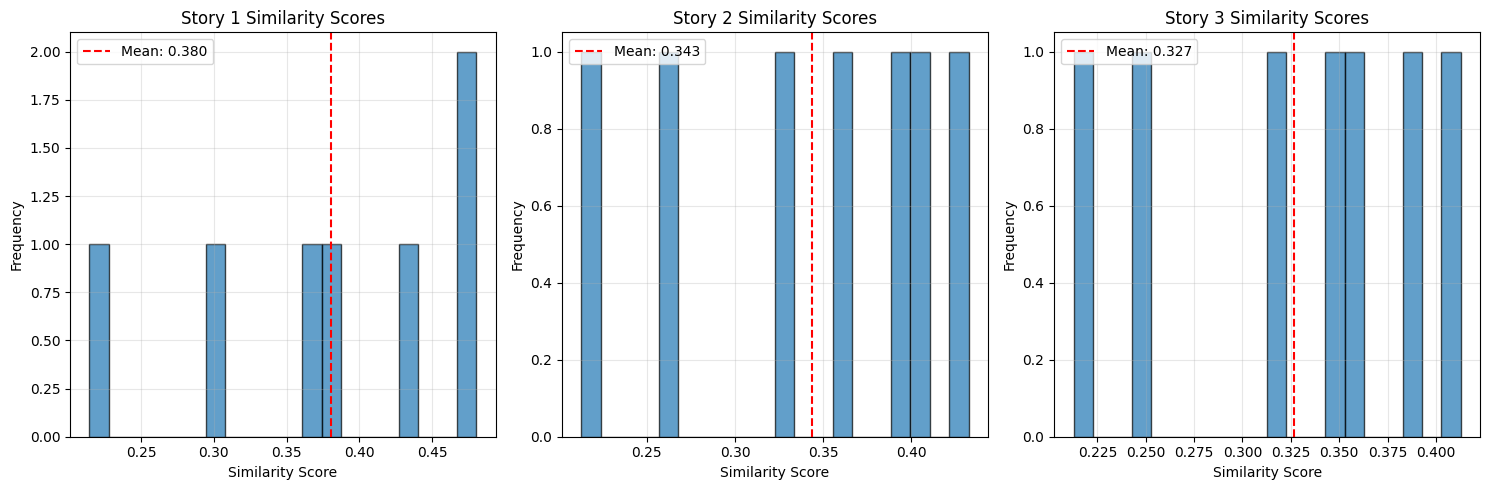


📈 SUMMARY STATISTICS TABLE:
           Metric  Mean   Std   Min   Max  Count
New Story 1 Score 0.380 0.096 0.214 0.481      7
New Story 2 Score 0.343 0.081 0.213 0.432      7
New Story 3 Score 0.327 0.072 0.213 0.413      7

🏆 BEST AND WORST MATCHES:
🥇 Best Match (Score: 0.481):
   Original: Only meat. She only eats meat. Even as a baby, only meat. We were worried she would have deficiencies....
   Match: Lily was hungry. She wanted to eat steak. Steak was her favorite food. She saw a big steak on the table. It smelled good. She wanted to take it.

But ...

🥉 Worst Top Match (Score: 0.214):
   Original: Ah oui, oui moi c'est la texture. Je n'arrive pas à lui mélanger, c'est même plus la peine. Pour ***[nom de l’enfant] c'est de la viande, de la viande...
   Match: Lily was hungry. She wanted to eat steak. Steak was her favorite food. She saw a big steak on the table. It smelled good. She wanted to take it.

But ...

💾 All analysis complete! CSV saved with 7 rows.


In [ ]:
# Detailed analysis of the ALL LABELS similarity results
if 'all_labels_similarity_df' in locals() and all_labels_similarity_df is not None:
    print("🔍 DETAILED ANALYSIS OF ALL LABELS SIMILARITY RESULTS")
    print("=" * 60)
    
    # Show detailed examples for each label
    print("📖 DETAILED EXAMPLES BY LABEL:")
    for i, row in all_labels_similarity_df.iterrows():
        print(f"\n🏷️ LABEL: '{row['label']}'")
        print(f"Original Text: {row['text'][:200]}{'...' if len(row['text']) > 200 else ''}")
        
        for j in range(1, 4):  # Top 3 similar stories
            story_key = f'new_story_{j}'
            score_key = f'new_story_{j}_score'
            
            if story_key in row and score_key in row:
                print(f"\n  📚 Similar Story {j} (Score: {row[score_key]:.3f}):")
                story_preview = row[story_key][:250] + "..." if len(row[story_key]) > 250 else row[story_key]
                print(f"  {story_preview}")
        
        print("-" * 80)
    
    # Create visualizations
    print(f"\n📊 SIMILARITY SCORE DISTRIBUTIONS BY RANK:")
    
    import matplotlib.pyplot as plt
    
    # Plot similarity scores distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Individual score distributions
    for i in range(1, 4):
        score_col = f'new_story_{i}_score'
        if score_col in all_labels_similarity_df.columns:
            row = (i-1) // 2
            col = (i-1) % 2
            
            scores = all_labels_similarity_df[score_col]
            
            axes[row, col].hist(scores, bins=15, alpha=0.7, edgecolor='black', color=f'C{i-1}')
            axes[row, col].set_title(f'Story Rank {i} Similarity Scores')
            axes[row, col].set_xlabel('Similarity Score')
            axes[row, col].set_ylabel('Frequency')
            axes[row, col].axvline(scores.mean(), color='red', linestyle='--', 
                             label=f'Mean: {scores.mean():.3f}')
            axes[row, col].legend()
            axes[row, col].grid(True, alpha=0.3)
    
    # Comparison plot
    axes[1, 1].boxplot([all_labels_similarity_df[f'new_story_{i}_score'] for i in range(1, 4)], 
                       labels=['Rank 1', 'Rank 2', 'Rank 3'])
    axes[1, 1].set_title('Similarity Scores by Rank')
    axes[1, 1].set_ylabel('Similarity Score')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics table
    print(f"\n📈 SUMMARY STATISTICS TABLE:")
    score_columns = [col for col in all_labels_similarity_df.columns if 'score' in col]
    stats_data = []
    
    for col in score_columns:
        scores = all_labels_similarity_df[col]
        stats_data.append({
            'Rank': col.replace('new_story_', '').replace('_score', ''),
            'Mean': f"{scores.mean():.3f}",
            'Std': f"{scores.std():.3f}",
            'Min': f"{scores.min():.3f}",
            'Max': f"{scores.max():.3f}",
            'Count': len(scores)
        })
    
    stats_df = pd.DataFrame(stats_data)
    print(stats_df.to_string(index=False))
    
    # Label-wise analysis
    print(f"\n🏷️ ANALYSIS BY LABEL:")
    for label in all_labels_similarity_df['label'].unique():
        label_row = all_labels_similarity_df[all_labels_similarity_df['label'] == label].iloc[0]
        top_score = label_row['new_story_1_score']
        print(f"  '{label}': Best match score = {top_score:.3f}")
    
    # Find best and worst matches across all labels
    print(f"\n🏆 BEST AND WORST MATCHES ACROSS ALL LABELS:")
    
    # Best overall match
    best_scores = []
    for i in range(1, 4):
        score_col = f'new_story_{i}_score'
        if score_col in all_labels_similarity_df.columns:
            max_idx = all_labels_similarity_df[score_col].idxmax()
            max_score = all_labels_similarity_df.loc[max_idx, score_col]
            best_scores.append((max_score, i, max_idx))
    
    best_score, best_rank, best_idx = max(best_scores)
    best_row = all_labels_similarity_df.iloc[best_idx]
    
    print(f"🥇 Best Overall Match (Score: {best_score:.3f}):")
    print(f"   Label: '{best_row['label']}'")
    print(f"   Original: {best_row['text'][:150]}...")
    print(f"   Match: {best_row[f'new_story_{best_rank}'][:150]}...")
    
    # Worst match among top scores
    top_scores = all_labels_similarity_df['new_story_1_score']
    worst_idx = top_scores.idxmin()
    worst_score = top_scores.min()
    worst_row = all_labels_similarity_df.iloc[worst_idx]
    
    print(f"\n🥉 Worst Top Match (Score: {worst_score:.3f}):")
    print(f"   Label: '{worst_row['label']}'")
    print(f"   Original: {worst_row['text'][:150]}...")
    print(f"   Match: {worst_row['new_story_1'][:150]}...")
    
    # Overall summary
    print(f"\n📋 FINAL SUMMARY:")
    print(f"   Total labels processed: {len(all_labels_similarity_df)}")
    print(f"   Average top similarity: {all_labels_similarity_df['new_story_1_score'].mean():.3f}")
    print(f"   CSV saved as: 'similarity_results_all_labels.csv'")
    
else:
    print("❌ No similarity results available. Run the previous cell first.")

In [52]:
# Enhanced function to find similar stories for ALL labels with flexible text selection
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

def find_similar_stories_for_all_labels_enhanced(label_text_dict, sampled_stories, model, 
                                                text_selection='first', random_seed=42):
    """
    Find top 3 similar stories for one representative text from each label
    
    Parameters:
    - label_text_dict: dictionary with labels and their texts
    - sampled_stories: list of all stories to search through
    - model: BERT model for embeddings
    - text_selection: strategy for selecting representative text
        'first': select first text (default)
        'longest': select the longest text
        'shortest': select the shortest text
        'random': select a random text
        'middle': select the middle text (by index)
    - random_seed: seed for random selection (if using 'random' strategy)
    
    Returns:
    - DataFrame with results for all labels
    """
    
    if not label_text_dict:
        print("❌ No label dictionary available")
        return None
    
    print(f"🎯 Processing ALL {len(label_text_dict)} labels")
    print(f"📋 Text selection strategy: {text_selection}")
    print("=" * 50)
    
    # Set random seed for reproducibility
    if text_selection == 'random':
        random.seed(random_seed)
    
    # Prepare the results list
    results = []
    
    # Get one representative text from each label using the specified strategy
    representative_texts = []
    labels = []
    selection_info = []
    
    for label, texts in label_text_dict.items():
        if texts:  # Make sure there are texts under this label
            # Choose representative text based on strategy
            if text_selection == 'first':
                selected_text = texts[0]
                info = f"first of {len(texts)}"
            elif text_selection == 'longest':
                selected_text = max(texts, key=len)
                info = f"longest ({len(selected_text)} chars) of {len(texts)}"
            elif text_selection == 'shortest':
                selected_text = min(texts, key=len)
                info = f"shortest ({len(selected_text)} chars) of {len(texts)}"
            elif text_selection == 'random':
                selected_text = random.choice(texts)
                info = f"random of {len(texts)}"
            elif text_selection == 'middle':
                middle_idx = len(texts) // 2
                selected_text = texts[middle_idx]
                info = f"middle (index {middle_idx}) of {len(texts)}"
            else:
                selected_text = texts[0]  # Default to first
                info = f"first (default) of {len(texts)}"
            
            representative_texts.append(selected_text)
            labels.append(label)
            selection_info.append(info)
            print(f"📌 Label '{label}': Selected {info} texts")
    
    print(f"\n🧠 Generating embeddings for {len(representative_texts)} representative texts...")
    target_embeddings = model.encode(representative_texts, show_progress_bar=True)
    
    # Filter stories to only include those with 4 lines maximum
    print("🔍 Filtering stories to include only those with 4 lines maximum...")
    filtered_stories = []
    filtered_indices = []
    
    for i, story in enumerate(sampled_stories):
        # Count newline characters - 4 lines means 3 newlines maximum
        if story.count('\n') <= 4 and story.count('\n') >= 3:  # Ensure at least one line
            filtered_stories.append(story)
            filtered_indices.append(i)
    
    print(f"📊 Story filtering results:")
    print(f"   Original stories: {len(sampled_stories)}")
    print(f"   Stories with ≤4 lines: {len(filtered_stories)}")
    print(f"   Filtered out: {len(sampled_stories) - len(filtered_stories)}")
    
    if len(filtered_stories) == 0:
        print("❌ No stories found with 4 lines or fewer!")
        return None
    
    # Generate embeddings for filtered stories
    print("🧠 Generating embeddings for filtered stories...")
    truncated_stories = [story[:512] if len(story) > 512 else story for story in filtered_stories]
    story_embeddings = model.encode(truncated_stories, show_progress_bar=True)
    
    # Calculate similarities and find top matches for each representative text
    print("📊 Calculating similarities...")
    similarities = cosine_similarity(target_embeddings, story_embeddings)
    
    for i, (text, label, info) in enumerate(zip(representative_texts, labels, selection_info)):
        print(f"Processing label {i+1}/{len(labels)}: '{label}' ({info})")
        
        # Get similarity scores for this text
        text_similarities = similarities[i]
        
        # Find top 3 most similar stories
        top_indices = text_similarities.argsort()[-3:][::-1]  # Top 3, descending
        
        # Prepare row data
        row_data = {
            'label': label,
            'text': text,
            'text_length': len(text),
            'text_selection_strategy': text_selection,
            'text_selection_info': info
        }
        
        # Add top 3 similar stories and their scores
        for rank, story_idx in enumerate(top_indices, 1):
            similarity_score = text_similarities[story_idx]
            similar_story = filtered_stories[story_idx]  # Use filtered stories
            
            row_data[f'similar_story_{rank}'] = similar_story
            row_data[f'similarity_score_{rank}'] = round(similarity_score, 4)
            row_data[f'story_{rank}_length'] = len(similar_story)
        
        results.append(row_data)
    
    return pd.DataFrame(results)

# Function to compare different selection strategies
def compare_selection_strategies(label_text_dict, sampled_stories, model, strategies=['first', 'longest', 'random']):
    """
    Compare results from different text selection strategies
    """
    print("🔄 COMPARING TEXT SELECTION STRATEGIES")
    print("=" * 50)
    
    comparison_results = {}
    
    for strategy in strategies:
        print(f"\n🎯 Testing strategy: {strategy}")
        df = find_similar_stories_for_all_labels_enhanced(
            label_text_dict, sampled_stories, model, text_selection=strategy
        )
        
        if df is not None:
            avg_score = df['similarity_score_1'].mean()
            comparison_results[strategy] = {
                'dataframe': df,
                'avg_top_score': avg_score,
                'total_labels': len(df)
            }
            print(f"Average top similarity score: {avg_score:.3f}")
    
    # Summary comparison
    print(f"\n📊 STRATEGY COMPARISON SUMMARY:")
    for strategy, results in comparison_results.items():
        print(f"  {strategy}: Avg top score = {results['avg_top_score']:.3f}")
    
    return comparison_results

# Execute with enhanced function - you can choose your preferred strategy
if 'label_text_dict' in locals() and 'sampled_stories' in locals() and 'model' in locals():
    print("🚀 CREATING ENHANCED SIMILARITY CSV FOR ALL LABELS")
    print("=" * 60)
    
    # You can change the text_selection parameter here:
    # Options: 'first', 'longest', 'shortest', 'random', 'middle'
    selected_strategy = 'first'  # Change this to your preferred strategy
    
    print(f"Using text selection strategy: {selected_strategy}")
    
    # Create the similarity DataFrame for ALL labels with enhanced selection
    enhanced_similarity_df = find_similar_stories_for_all_labels_enhanced(
        label_text_dict=label_text_dict,
        sampled_stories=sampled_stories,
        model=model,
        text_selection=selected_strategy
    )
    
    if enhanced_similarity_df is not None:
        print(f"\n📊 ENHANCED RESULTS SUMMARY:")
        print(f"Created DataFrame with {len(enhanced_similarity_df)} rows and {len(enhanced_similarity_df.columns)} columns")
        print(f"Columns: {list(enhanced_similarity_df.columns)}")
        
        # Show a sample of the results
        print(f"\n📋 SAMPLE RESULTS:")
        pd.set_option('display.max_colwidth', 60)
        print(enhanced_similarity_df[['label', 'text_selection_info', 'similarity_score_1', 'similarity_score_2', 'similarity_score_3']].head())
        
        # Save to CSV with strategy name
        csv_filename = f"similarity_results_all_labels_{selected_strategy}.csv"
        enhanced_similarity_df.to_csv(csv_filename, index=False, encoding='utf-8')
        print(f"\n💾 Enhanced results saved to: {csv_filename}")
        
        # Show statistics
        print(f"\n📈 SIMILARITY STATISTICS:")
        for i in range(1, 4):
            col = f'similarity_score_{i}'
            scores = enhanced_similarity_df[col]
            print(f"  Rank {i} similarities:")
            print(f"    Average: {scores.mean():.3f}")
            print(f"    Max: {scores.max():.3f}")
            print(f"    Min: {scores.min():.3f}")
        
        # Show text length statistics
        print(f"\n📏 TEXT LENGTH STATISTICS:")
        text_lengths = enhanced_similarity_df['text_length']
        print(f"  Original texts - Avg: {text_lengths.mean():.0f}, Min: {text_lengths.min()}, Max: {text_lengths.max()}")
        
    # Optional: Compare different strategies (uncomment to run)
    # print("\n" + "="*60)
    # comparison = compare_selection_strategies(label_text_dict, sampled_stories, model)
    
else:
    missing = []
    if 'label_text_dict' not in locals():
        missing.append("label_text_dict")
    if 'sampled_stories' not in locals():
        missing.append("sampled_stories")
    if 'model' not in locals():
        missing.append("model")
    
    print(f"❌ Missing required variables: {missing}")
    print("Please run the previous cells to load the data and create the label dictionary.")

🚀 CREATING ENHANCED SIMILARITY CSV FOR ALL LABELS
Using text selection strategy: first
🎯 Processing ALL 73 labels
📋 Text selection strategy: first
📌 Label 'Food selectivity': Selected first of 7 texts
📌 Label 'Pica': Selected first of 1 texts
📌 Label 'Food selectivity ': Selected first of 4 texts
📌 Label 'Food separation': Selected first of 2 texts
📌 Label 'Food rigidity': Selected first of 1 texts
📌 Label 'Spicy preference': Selected first of 1 texts
📌 Label 'Fruits preference': Selected first of 1 texts
📌 Label 'Body signal': Selected first of 2 texts
📌 Label 'Rhythm': Selected first of 1 texts
📌 Label 'Noise sensitivity': Selected first of 12 texts
📌 Label 'Unpredictability': Selected first of 1 texts
📌 Label 'Rhythm ': Selected first of 1 texts
📌 Label 'Noise management': Selected first of 1 texts
📌 Label 'Attraction to water': Selected first of 2 texts
📌 Label 'Aversion to water': Selected first of 4 texts
📌 Label 'Attraction and aversion to water': Selected first of 2 texts
📌 Lab

Batches: 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


🔍 Filtering stories to include only those with 4 lines maximum...
📊 Story filtering results:
   Original stories: 1000
   Stories with ≤4 lines: 226
   Filtered out: 774
🧠 Generating embeddings for filtered stories...


Batches: 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

📊 Calculating similarities...
Processing label 1/73: 'Food selectivity' (first of 7)
Processing label 2/73: 'Pica' (first of 1)
Processing label 3/73: 'Food selectivity ' (first of 4)
Processing label 4/73: 'Food separation' (first of 2)
Processing label 5/73: 'Food rigidity' (first of 1)
Processing label 6/73: 'Spicy preference' (first of 1)
Processing label 7/73: 'Fruits preference' (first of 1)
Processing label 8/73: 'Body signal' (first of 2)
Processing label 9/73: 'Rhythm' (first of 1)
Processing label 10/73: 'Noise sensitivity' (first of 12)
Processing label 11/73: 'Unpredictability' (first of 1)
Processing label 12/73: 'Rhythm ' (first of 1)
Processing label 13/73: 'Noise management' (first of 1)
Processing label 14/73: 'Attraction to water' (first of 2)
Processing label 15/73: 'Aversion to water' (first of 4)
Processing label 16/73: 'Attraction and aversion to water' (first of 2)
Processing label 17/73: 'Dysregulation' (first of 6)
Processing label 18/73: 'Sensitivity to flavor

In [53]:
# Print FULL details for each label: original text + top 2 similar stories
if 'enhanced_similarity_df' in locals() and enhanced_similarity_df is not None:
    print("📖 COMPLETE RESULTS: LABEL + TEXT + TOP 2 SIMILAR STORIES")
    print("=" * 80)
    
    for i, row in enhanced_similarity_df.iterrows():
        print(f"\n{'='*60}")
        print(f"🏷️  LABEL {i+1}: {row['label']}")
        print(f"{'='*60}")
        
        print(f"\n📝 ORIGINAL TEXT:")
        print(f"{row['text']}")
        print(f"\n📏 Length: {row['text_length']} characters")
        print(f"🎯 Selection strategy: {row['text_selection_info']}")
        
        # Print top 2 similar stories
        for story_rank in [1, 2]:
            story_col = f'similar_story_{story_rank}'
            score_col = f'similarity_score_{story_rank}'
            length_col = f'story_{story_rank}_length'
            
            if story_col in row and score_col in row:
                print(f"\n📚 SIMILAR STORY #{story_rank} (Similarity Score: {row[score_col]:.4f})")
                print(f"📏 Length: {row[length_col]} characters")
                print(f"{'─'*50}")
                print(f"{row[story_col]}")
                print(f"{'─'*50}")
        
        print(f"\n{'='*80}")
        
        # Add a pause every 3 entries to make it easier to read
        if (i + 1) % 3 == 0 and i < len(enhanced_similarity_df) - 1:
            print(f"\n🔄 Processed {i+1}/{len(enhanced_similarity_df)} labels so far...")
            print("=" * 80)
    
    print(f"\n🎉 COMPLETE! Displayed all {len(enhanced_similarity_df)} labels with their original text and top 2 similar stories.")

elif 'all_labels_similarity_df' in locals() and all_labels_similarity_df is not None:
    print("📖 COMPLETE RESULTS: LABEL + TEXT + TOP 2 SIMILAR STORIES")
    print("=" * 80)
    
    for i, row in all_labels_similarity_df.iterrows():
        print(f"\n{'='*60}")
        print(f"🏷️  LABEL {i+1}: {row['label']}")
        print(f"{'='*60}")
        
        print(f"\n📝 ORIGINAL TEXT:")
        print(f"{row['text']}")
        print(f"\n📏 Length: {len(row['text'])} characters")
        
        # Print top 2 similar stories
        for story_rank in [1, 2]:
            story_col = f'new_story_{story_rank}'
            score_col = f'new_story_{story_rank}_score'
            
            if story_col in row and score_col in row:
                print(f"\n📚 SIMILAR STORY #{story_rank} (Similarity Score: {row[score_col]:.4f})")
                print(f"📏 Length: {len(row[story_col])} characters")
                print(f"{'─'*50}")
                print(f"{row[story_col]}")
                print(f"{'─'*50}")
        
        print(f"\n{'='*80}")
        
        # Add a pause every 3 entries to make it easier to read
        if (i + 1) % 3 == 0 and i < len(all_labels_similarity_df) - 1:
            print(f"\n🔄 Processed {i+1}/{len(all_labels_similarity_df)} labels so far...")
            print("=" * 80)
    
    print(f"\n🎉 COMPLETE! Displayed all {len(all_labels_similarity_df)} labels with their original text and top 2 similar stories.")

else:
    print("❌ No similarity results available to display.")
    print("Please run one of the similarity analysis cells first:")
    print("  - Enhanced similarity analysis (recommended)")
    print("  - Basic similarity analysis")
    
    available_vars = [var for var in ['enhanced_similarity_df', 'all_labels_similarity_df'] if var in locals()]
    if available_vars:
        print(f"Available variables: {available_vars}")
    else:
        print("No similarity dataframes found in memory.")

📖 COMPLETE RESULTS: LABEL + TEXT + TOP 2 SIMILAR STORIES

🏷️  LABEL 1: Food selectivity

📝 ORIGINAL TEXT:
***[child's name] starting from 18 months had a lot [silence] he was a child who ate everything. He was a big fan of broccoli [silence] and from one day to the next decided that he would only eat pasta, ground beef, and green beans. But frozen, without butter, it couldn't be canned. Especially not fresh, without seasoning, no salt, so there you go. So we already started to question it with my husband, saying it's strange. Anything with a cake-like texture was out of the question. Anything like yogurt. A lot of eating disorders eventually. It always had to be the same thing, and when it wasn't, the plate would fly, he would scream, he would have huge tantrums.

📏 Length: 667 characters
🎯 Selection strategy: first of 7

📚 SIMILAR STORY #1 (Similarity Score: 0.4128)
📏 Length: 1069 characters
──────────────────────────────────────────────────
Once upon a time, there was a boy named Tim